
📊 Statistical difference (Control vs Treated) for each Cell Type:
 - Epi: p = 0.8571
 - Mes: p = 0.3333
 - Epi/Mes: p = 0.2667
 - no info: Not enough data for test

📊 Statistical difference (Control vs Treated) for each Necrosis level:
 - no: Not enough data for test
 - moderate: p = 0.3524
 - high: p = 0.7879
 - no info: Not enough data for test


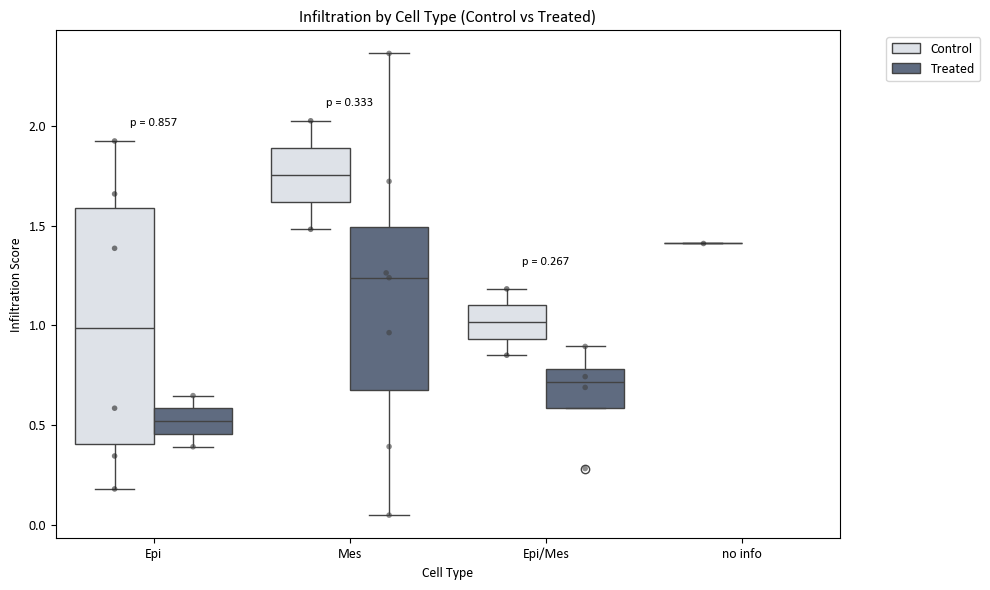

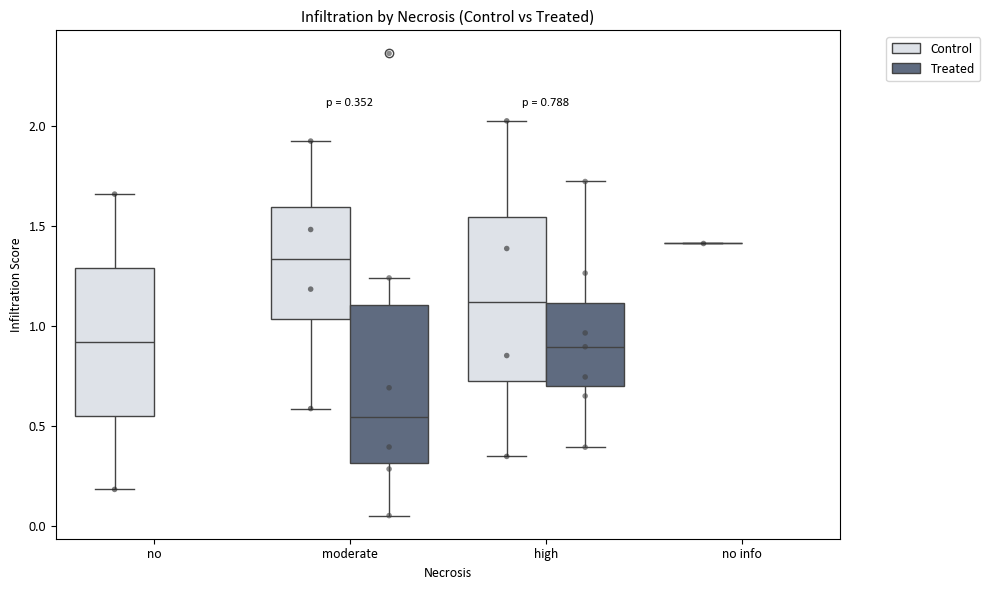


📊 Control group:
 - Cell Type: Kruskal–Wallis stat = 3.11, p = 0.3756
 - Necrosis : Kruskal–Wallis stat = 0.39, p = 0.9430

📊 Treated group:
 - Cell Type: Kruskal–Wallis stat = 2.74, p = 0.2543
 - Necrosis : Kruskal–Wallis stat = 0.73, p = 0.3914


In [1]:
import pandas as pd
from scipy.stats import mannwhitneyu, kruskal
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('Infiltration vs. Cell Type_Necrosis.xlsx')

# Optional: Filter data if needed
filtered_df = df.copy()

# --- Mann–Whitney U test: Control vs Treated for each Cell Type ---
print("\n📊 Statistical difference (Control vs Treated) for each Cell Type:")

for ct in filtered_df['Cell Type'].unique():
    sub = filtered_df[filtered_df['Cell Type'] == ct]
    control_vals = sub[sub['Group'] == 'Control']['Infiltration_score']
    treated_vals = sub[sub['Group'] == 'Treated']['Infiltration_score']

    if len(control_vals) > 1 and len(treated_vals) > 1:
        stat, p = mannwhitneyu(control_vals, treated_vals, alternative='two-sided')
        print(f" - {ct}: p = {p:.4f}")
    else:
        print(f" - {ct}: Not enough data for test")

# --- Mann–Whitney U test: Control vs Treated for each Necrosis level ---
print("\n📊 Statistical difference (Control vs Treated) for each Necrosis level:")

for nec in filtered_df['Necrosis'].unique():
    sub = filtered_df[filtered_df['Necrosis'] == nec]
    control_vals = sub[sub['Group'] == 'Control']['Infiltration_score']
    treated_vals = sub[sub['Group'] == 'Treated']['Infiltration_score']

    if len(control_vals) > 1 and len(treated_vals) > 1:
        stat, p = mannwhitneyu(control_vals, treated_vals, alternative='two-sided')
        print(f" - {nec}: p = {p:.4f}")
    else:
        print(f" - {nec}: Not enough data for test")

# --- Boxplot: Infiltration Score by Cell Type ---
plt.rcParams['font.family'] = 'Calibri'
colors = ["#DCE1EA", "#5A6A85"]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cell Type', y='Infiltration_score', hue='Group', data=filtered_df, palette=colors)
sns.swarmplot(x='Cell Type', y='Infiltration_score', hue='Group', data=filtered_df,
              dodge=True, palette='dark:.25', size=4, alpha=0.6)

# Remove duplicate legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate p-values
celltypes = filtered_df['Cell Type'].unique()
custom_heights = [2.0, 2.1, 1.3]  # Manually adjusted for each category

for i, ct in enumerate(celltypes):
    sub = filtered_df[filtered_df['Cell Type'] == ct]
    control_vals = sub[sub['Group'] == 'Control']['Infiltration_score']
    treated_vals = sub[sub['Group'] == 'Treated']['Infiltration_score']

    if len(control_vals) > 1 and len(treated_vals) > 1:
        stat, p = mannwhitneyu(control_vals, treated_vals, alternative='two-sided')
        plt.text(i, custom_heights[i], f"p = {p:.3f}", ha='center', fontsize=9)

plt.xlabel("Cell Type")
plt.ylabel("Infiltration Score")
plt.title("Infiltration by Cell Type (Control vs Treated)")
plt.tight_layout()
# plt.savefig("Infiltration vs Cell Type_p_poster.png", dpi=300, bbox_inches='tight')
plt.show()

# --- Boxplot: Infiltration Score by Necrosis ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Necrosis', y='Infiltration_score', hue='Group', data=filtered_df, palette=colors)
sns.swarmplot(x='Necrosis', y='Infiltration_score', hue='Group', data=filtered_df,
              dodge=True, palette='dark:.25', size=4, alpha=0.6)

# Remove duplicate legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate p-values
necrosis_labels = filtered_df['Necrosis'].unique()
custom_heights = [2.0, 2.1, 2.1]  # Manually adjusted for each category

for i, nec in enumerate(necrosis_labels):
    sub = filtered_df[filtered_df['Necrosis'] == nec]
    control_vals = sub[sub['Group'] == 'Control']['Infiltration_score']
    treated_vals = sub[sub['Group'] == 'Treated']['Infiltration_score']

    if len(control_vals) > 1 and len(treated_vals) > 1:
        stat, p = mannwhitneyu(control_vals, treated_vals, alternative='two-sided')
        plt.text(i, custom_heights[i], f"p = {p:.3f}", ha='center', fontsize=9)

plt.xlabel("Necrosis")
plt.ylabel("Infiltration Score")
plt.title("Infiltration by Necrosis (Control vs Treated)")
plt.tight_layout()
# plt.savefig("Infiltration vs Necrosis_p_poster.png", dpi=300, bbox_inches='tight')
plt.show()

# --- Kruskal–Wallis tests within each group ---
for group in ['Control', 'Treated']:
    sub_df = filtered_df[filtered_df['Group'] == group]

    # Test for Cell Type
    groups_ct = [g['Infiltration_score'].values for _, g in sub_df.groupby('Cell Type')]
    stat_ct, p_ct = kruskal(*groups_ct)

    # Test for Necrosis
    groups_nec = [g['Infiltration_score'].values for _, g in sub_df.groupby('Necrosis')]
    stat_nec, p_nec = kruskal(*groups_nec)

    print(f"\n📊 {group} group:")
    print(f" - Cell Type: Kruskal–Wallis stat = {stat_ct:.2f}, p = {p_ct:.4f}")
    print(f" - Necrosis : Kruskal–Wallis stat = {stat_nec:.2f}, p = {p_nec:.4f}")
